In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
train = pd.read_csv('./data/train.csv')
#b_keyword = pd.read_csv('./data/brand_keyword_cnt.csv')
sales = pd.read_csv('./data/sales.csv')
#prd_info = pd.read_csv('./data/product_info.csv')

In [17]:
train.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#date column 따로 정의
date = train.columns[6:]
date

Index(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
       ...
       '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
       '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04'],
      dtype='object', length=459)

In [19]:
sales.head()

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train['대분류'].nunique() # 5 ; ['B002-C001-0002', 'B002-C001-0003', 'B002-C001-0001','B002-C001-0005', 'B002-C001-0004']

5

In [21]:
train.groupby('대분류').count()

,ID,제품,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
대분류,,,,,,,,,,,,,,,,,,,,,
B002-C001-0001,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,...,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768
B002-C001-0002,10954,10954,10954,10954,10954,10954,10954,10954,10954,10954,...,10954,10954,10954,10954,10954,10954,10954,10954,10954,10954
B002-C001-0003,444,444,444,444,444,444,444,444,444,444,...,444,444,444,444,444,444,444,444,444,444
B002-C001-0004,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
B002-C001-0005,613,613,613,613,613,613,613,613,613,613,...,613,613,613,613,613,613,613,613,613,613


In [22]:
train.duplicated(subset = ['제품']).sort_values()# 50

0        False
10586    False
10587    False
10588    False
10589    False
         ...  
9698      True
9695      True
9247      True
5340      True
6881      True
Length: 15890, dtype: bool

In [23]:
train['중분류'].unique() # 11

array(['B002-C002-0007', 'B002-C002-0008', 'B002-C002-0001',
       'B002-C002-0006', 'B002-C002-0004', 'B002-C002-0005',
       'B002-C002-0003', 'B002-C002-0002', 'B002-C002-0011',
       'B002-C002-0009', 'B002-C002-0010'], dtype=object)

In [24]:
train.groupby(['대분류','중분류'])['제품'].count()

대분류             중분류           
B002-C001-0001  B002-C002-0001    3608
                B002-C002-0009     160
B002-C001-0002  B002-C002-0002     946
                B002-C002-0003    1516
                B002-C002-0004    1168
                B002-C002-0005    2275
                B002-C002-0006    1675
                B002-C002-0007    2501
                B002-C002-0009     873
B002-C001-0003  B002-C002-0008     410
                B002-C002-0010      34
B002-C001-0004  B002-C002-0009     111
B002-C001-0005  B002-C002-0011     613
Name: 제품, dtype: int64

In [25]:
train['소분류'].unique() # 53

array(['B002-C003-0038', 'B002-C003-0044', 'B002-C003-0003',
       'B002-C003-0032', 'B002-C003-0034', 'B002-C003-0039',
       'B002-C003-0019', 'B002-C003-0025', 'B002-C003-0001',
       'B002-C003-0004', 'B002-C003-0036', 'B002-C003-0005',
       'B002-C003-0012', 'B002-C003-0011', 'B002-C003-0016',
       'B002-C003-0009', 'B002-C003-0010', 'B002-C003-0052',
       'B002-C003-0053', 'B002-C003-0006', 'B002-C003-0007',
       'B002-C003-0029', 'B002-C003-0045', 'B002-C003-0015',
       'B002-C003-0002', 'B002-C003-0022', 'B002-C003-0008',
       'B002-C003-0018', 'B002-C003-0035', 'B002-C003-0037',
       'B002-C003-0046', 'B002-C003-0040', 'B002-C003-0047',
       'B002-C003-0014', 'B002-C003-0023', 'B002-C003-0021',
       'B002-C003-0020', 'B002-C003-0013', 'B002-C003-0017',
       'B002-C003-0024', 'B002-C003-0026', 'B002-C003-0048',
       'B002-C003-0049', 'B002-C003-0028', 'B002-C003-0027',
       'B002-C003-0041', 'B002-C003-0030', 'B002-C003-0042',
       'B002-C003-0033',

In [26]:
train['브랜드'].unique() #3170

array(['B002-00001', 'B002-00002', 'B002-00003', ..., 'B002-03796',
       'B002-03798', 'B002-03799'], dtype=object)

In [27]:
train.groupby(['대분류','중분류','소분류']).count()

ID    제품   브랜드  2022-01-01  \
대분류            중분류            소분류                                            
B002-C001-0001 B002-C002-0001 B002-C003-0001   751   751   751         751   
                              B002-C003-0002   663   663   663         663   
                              B002-C003-0003  1426  1426  1426        1426   
                              B002-C003-0004   426   426   426         426   
                              B002-C003-0005   342   342   342         342   
               B002-C002-0009 B002-C003-0051   160   160   160         160   
B002-C001-0002 B002-C002-0002 B002-C003-0006   175   175   175         175   
                              B002-C003-0007   262   262   262         262   
                              B002-C003-0008   112   112   112         112   
                              B002-C003-0009   183   183   183         183   
                              B002-C003-0010   113   113   113         113   
                              B002-C003-0011   101   101   101         101   
               B002-C002-0003 B002-C003-0012    75    75    75          75   
                              B002-C003-0013   104   104   104         104   
                              B002-C003-0014   236   236   236         236   
                              B002-C003-0015   466   466   466         466   
                              B002-C003-0016   342   342   342         342   
                              B002-C003-0017   222   222   222         222   
                              B002-C003-0018    71    71    71          71   
               B002-C002-0004 B002-C003-0019   140   140   140         140   
                              B002-C003-0020   112   112   112         112   
                              B002-C003-0021   195   195   195         195   
                              B002-C003-0022   356   356   356         356   
                              B002-C003-0023   365   365   365         365   
               B002-C002-0005 B002-C003-0024   289   289   289         289   
                              B002-C003-0025   690   690   690         690   
                              B002-C003-0026   150   150   150         150   
                              B002-C003-0027   408   408   408         408   
                              B002-C003-0028   174   174   174         174   
                              B002-C003-0029   198   198   198         198   
                              B002-C003-0041   366   366   366         366   
               B002-C002-0006 B002-C003-0030   153   153   153         153   
                              B002-C003-0031    57    57    57          57   
                              B002-C003-0032   265   265   265         265   
                              B002-C003-0033   180   180   180         180   
                              B002-C003-0034  1020  1020  1020        1020   
               B002-C002-0007 B002-C003-0035   641   641   641         641   
                              B002-C003-0036   362   362   362         362   
                              B002-C003-0037   184   184   184         184   
                              B002-C003-0038   431   431   431         431   
                              B002-C003-0039   432   432   432         432   
                              B002-C003-0040   451   451   451         451   
               B002-C002-0009 B002-C003-0045   294   294   294         294   
                              B002-C003-0046   223   223   223         223   
                              B002-C003-0048   162   162   162         162   
                              B002-C003-0049   194   194   194         194   
B002-C001-0003 B002-C002-0008 B002-C003-0042    59    59    59          59   
                              B002-C003-0043   117   117   117         117   
                              B002-C003-0044   234   234   234         234   
               B002-C002-0010 B002-C003-0050    34    34    34        

In [28]:
train.groupby(['대분류','중분류','소분류','브랜드']).sum()[date]

2022-01-01  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           0   
                                             B002-00035           0   
                                             B002-00037           0   
                                             B002-00043           0   
                                             B002-00051           0   
...                                                             ...   
B002-C001-0005 B002-C002-0011 B002-C003-0053 B002-03448           0   
                                             B002-03463          34   
                                             B002-03476          38   
                                             B002-03528           0   
                                             B002-03709           0   

                                                         2022-01-02  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           0   
                                             B002-00035           0   
                                             B002-00037           0   
                                             B002-00043           0   
                                             B002-00051           0   
...                                                             ...   
B002-C001-0005 B002-C002-0011 B002-C003-0053 B002-03448           0   
                                             B002-03463          35   
                                             B002-03476          31   
                                             B002-03528           0   
                                             B002-03709           0   

                                                         2022-01-03  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           3   
                                             B002-00035           0   
                                             B002-00037           0   
                                             B002-00043           0   
                                             B002-00051           0   
...                                                             ...   
B002-C001-0005 B002-C002-0011 B002-C003-0053 B002-03448           0   
                                             B002-03463          37   
                                             B002-03476          31   
                                             B002-03528           0   
                                             B002-03709           0   

                                                         2022-01-04  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           4   
                                             B002-00035           0   
                                             B002-00037           0   
                                             B002-00043           0   
                                             B002-00051           0   
...                                                             ...   
B002-C001-0005 B002-C002-0011 B002-C003-0053 B002-03448           0   
                                             B002-03463          27   
                                             B002-03476           6   
                                             B002-03528           0   
                                             B002-03709           0   

                                                         2022-01-05  \
대분류            중분류            소분류            브랜드                      
B002-C001-0001 B002-C002-0001 B002-C003-0001 B002-00008           4   
                                             B002-00035           0   
                                             B002-00037           0   
      

In [29]:
sell_per_brand = train.groupby(['브랜드']).sum()[date]
sell_per_brand.head()
print(len(sell_per_brand))

3170


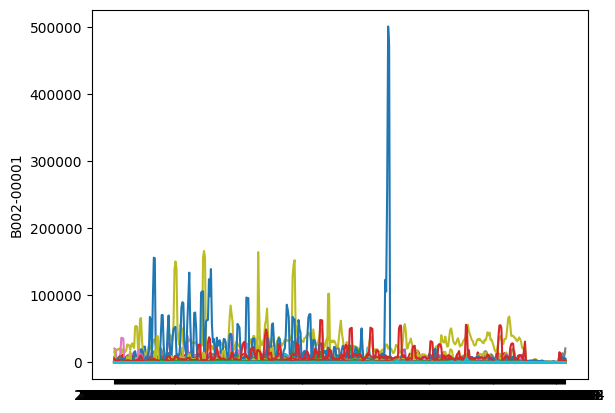

In [30]:
for row in range(len(sell_per_brand)) :
    sns.lineplot(sell_per_brand.iloc[row])


브랜드를 통해서는 유의미한 plotting이 불가능하다고 판단. 하지만, outlier는 아직 보인다.

# 대분류에 따른 판매량 변화 측정

In [ ]:
sell_per_Large = train.groupby(['대분류']).sum()[date]
sell_per_Large = sell_per_Large.reset_index()
display(sell_per_Large.head())
print(len(sell_per_Large))

name_large = sell_per_Large['대분류']
print(name_large)
temp = sell_per_Large.T.iloc[1:]
temp.head()

temp = temp.rename(columns=dict(zip(temp.columns, name_large)))

sns.lineplot(temp)

<Axes: >

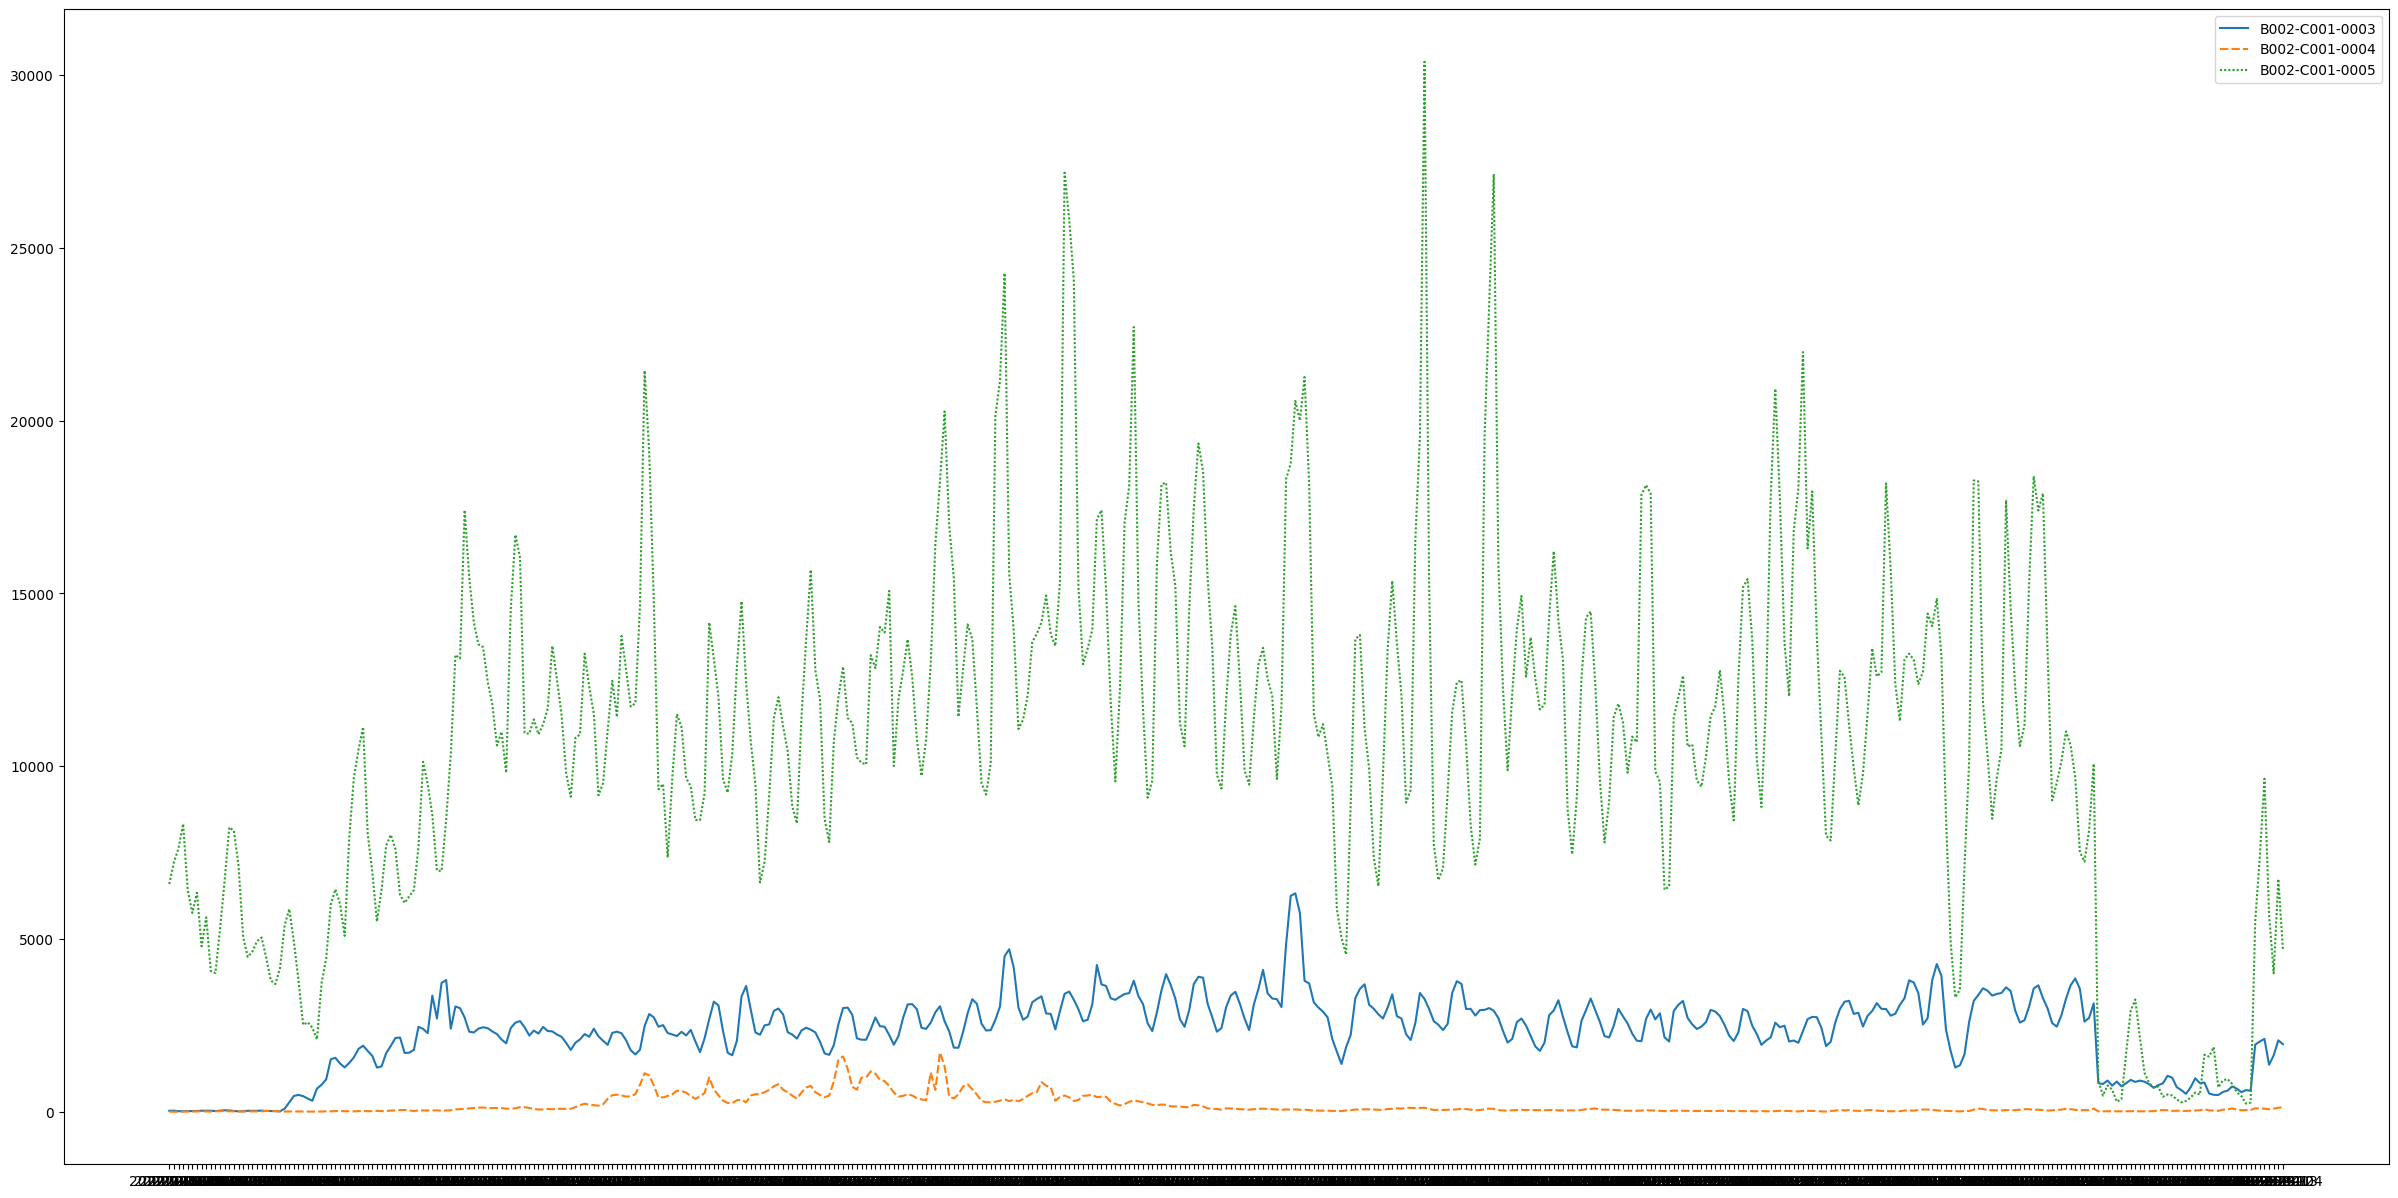

In [154]:
plt.figure(figsize=(30,15))
sns.lineplot(temp[['B002-C001-0003','B002-C001-0004', 'B002-C001-0005']])

In [186]:
t= temp[temp['B002-C001-0001']<40000]['B002-C001-0001']

In [191]:
t = pd.DataFrame(t).reset_index() #'2023-01-24'

In [199]:
temp_r = temp.reset_index()

In [202]:
temp_r[temp_r['index'] == '2023-01-24']

,index,B002-C001-0001,B002-C001-0002,B002-C001-0003,B002-C001-0004,B002-C001-0005
388,2023-01-24,32939,102362,1345,13,3535


<Axes: >

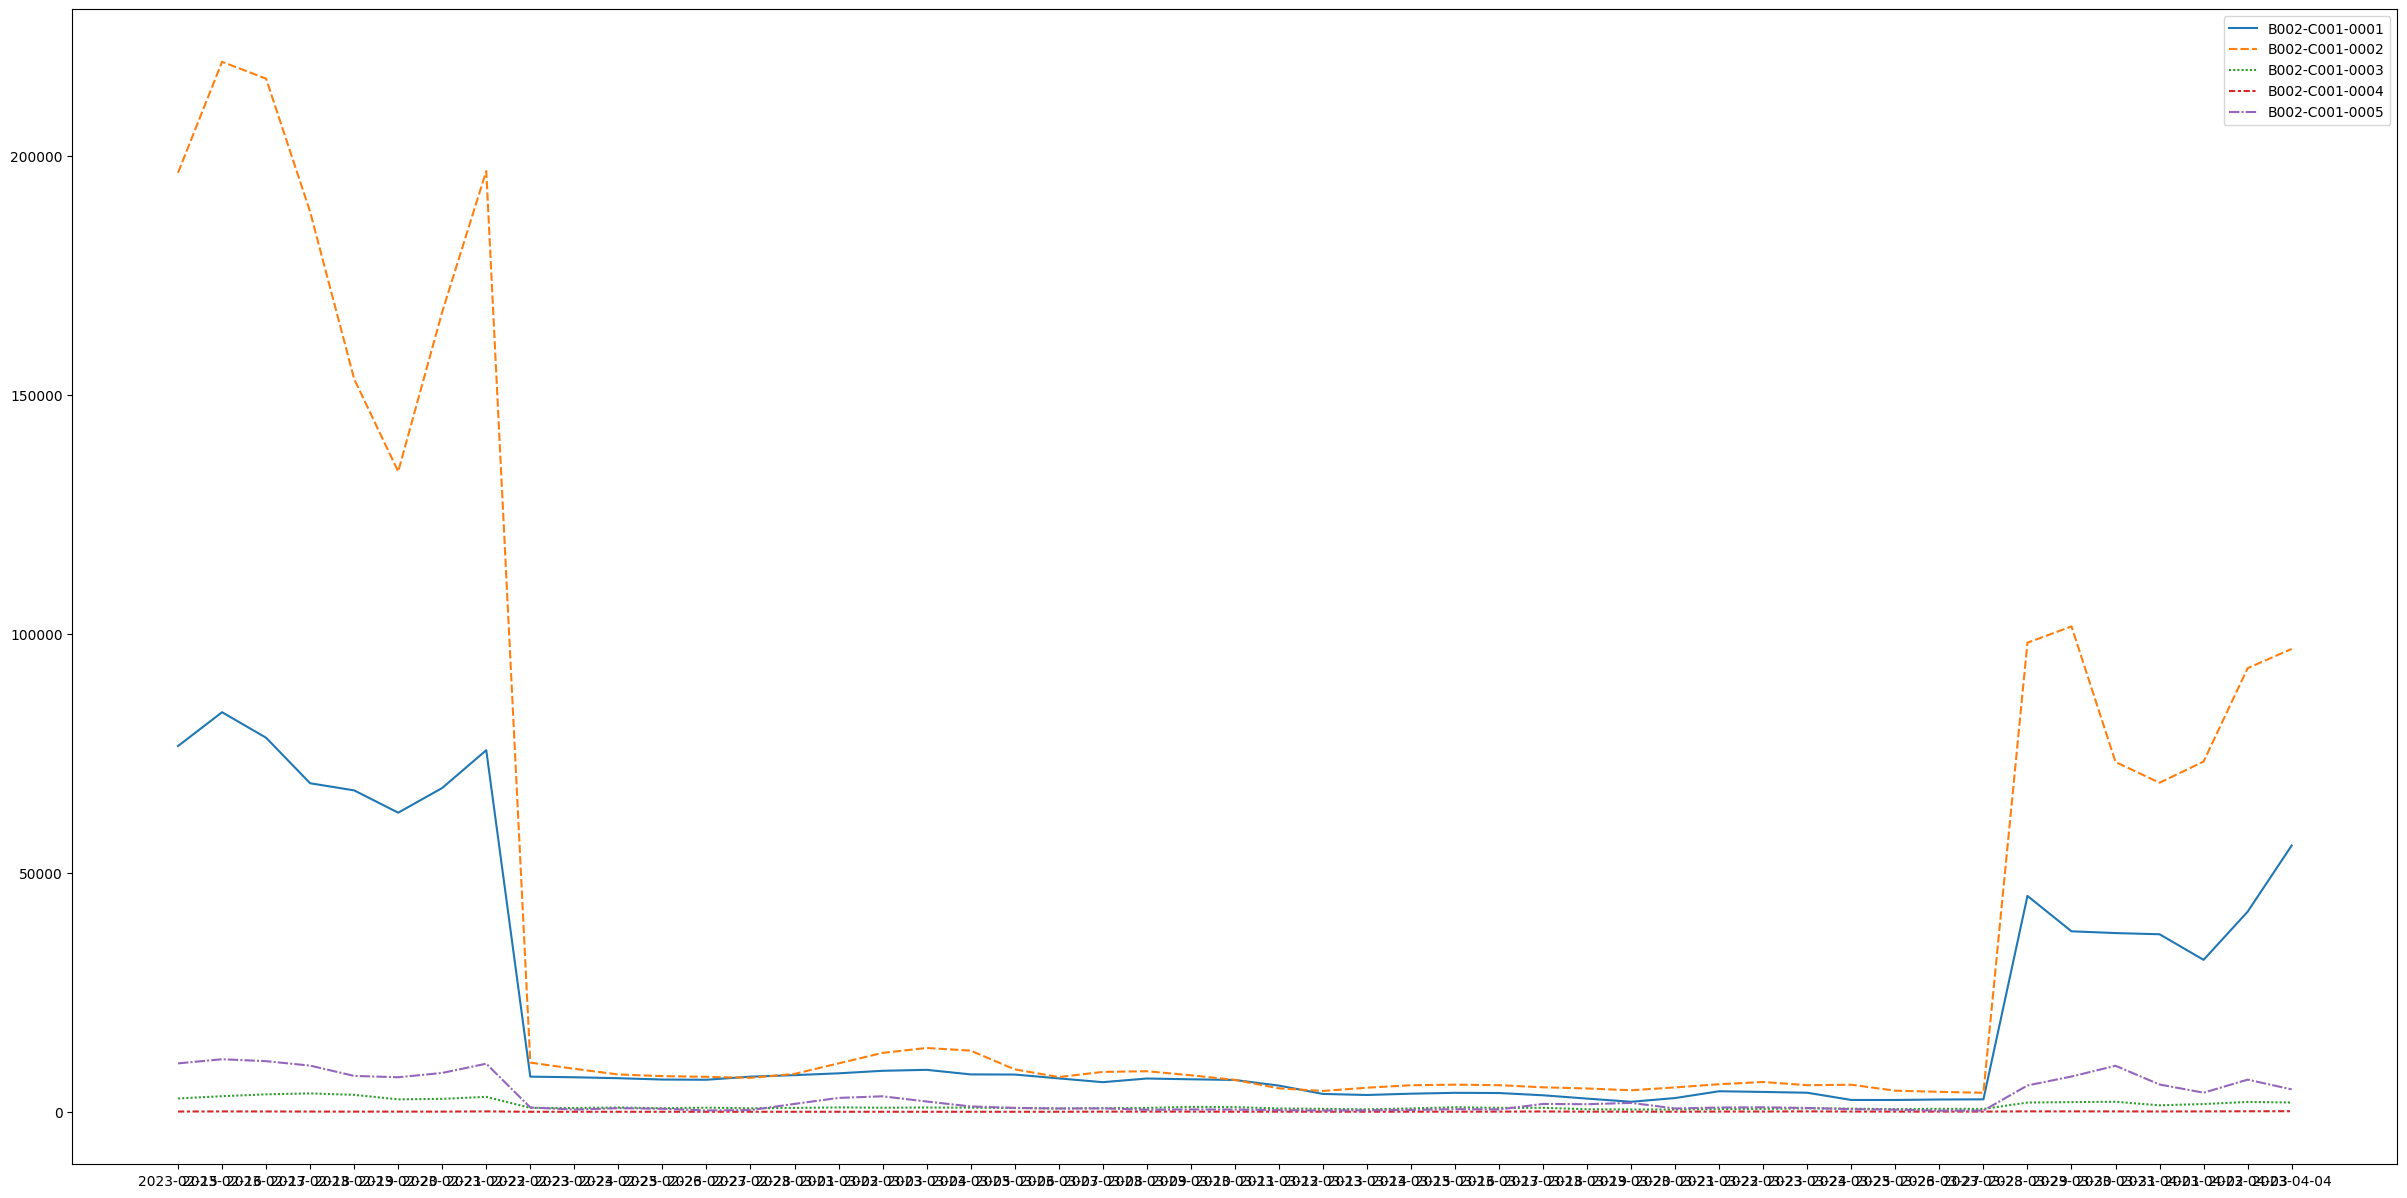

In [208]:
plt.figure(figsize=(30,15))
sns.lineplot(temp.iloc[410:])

<Axes: ylabel='B002-C001-0001'>

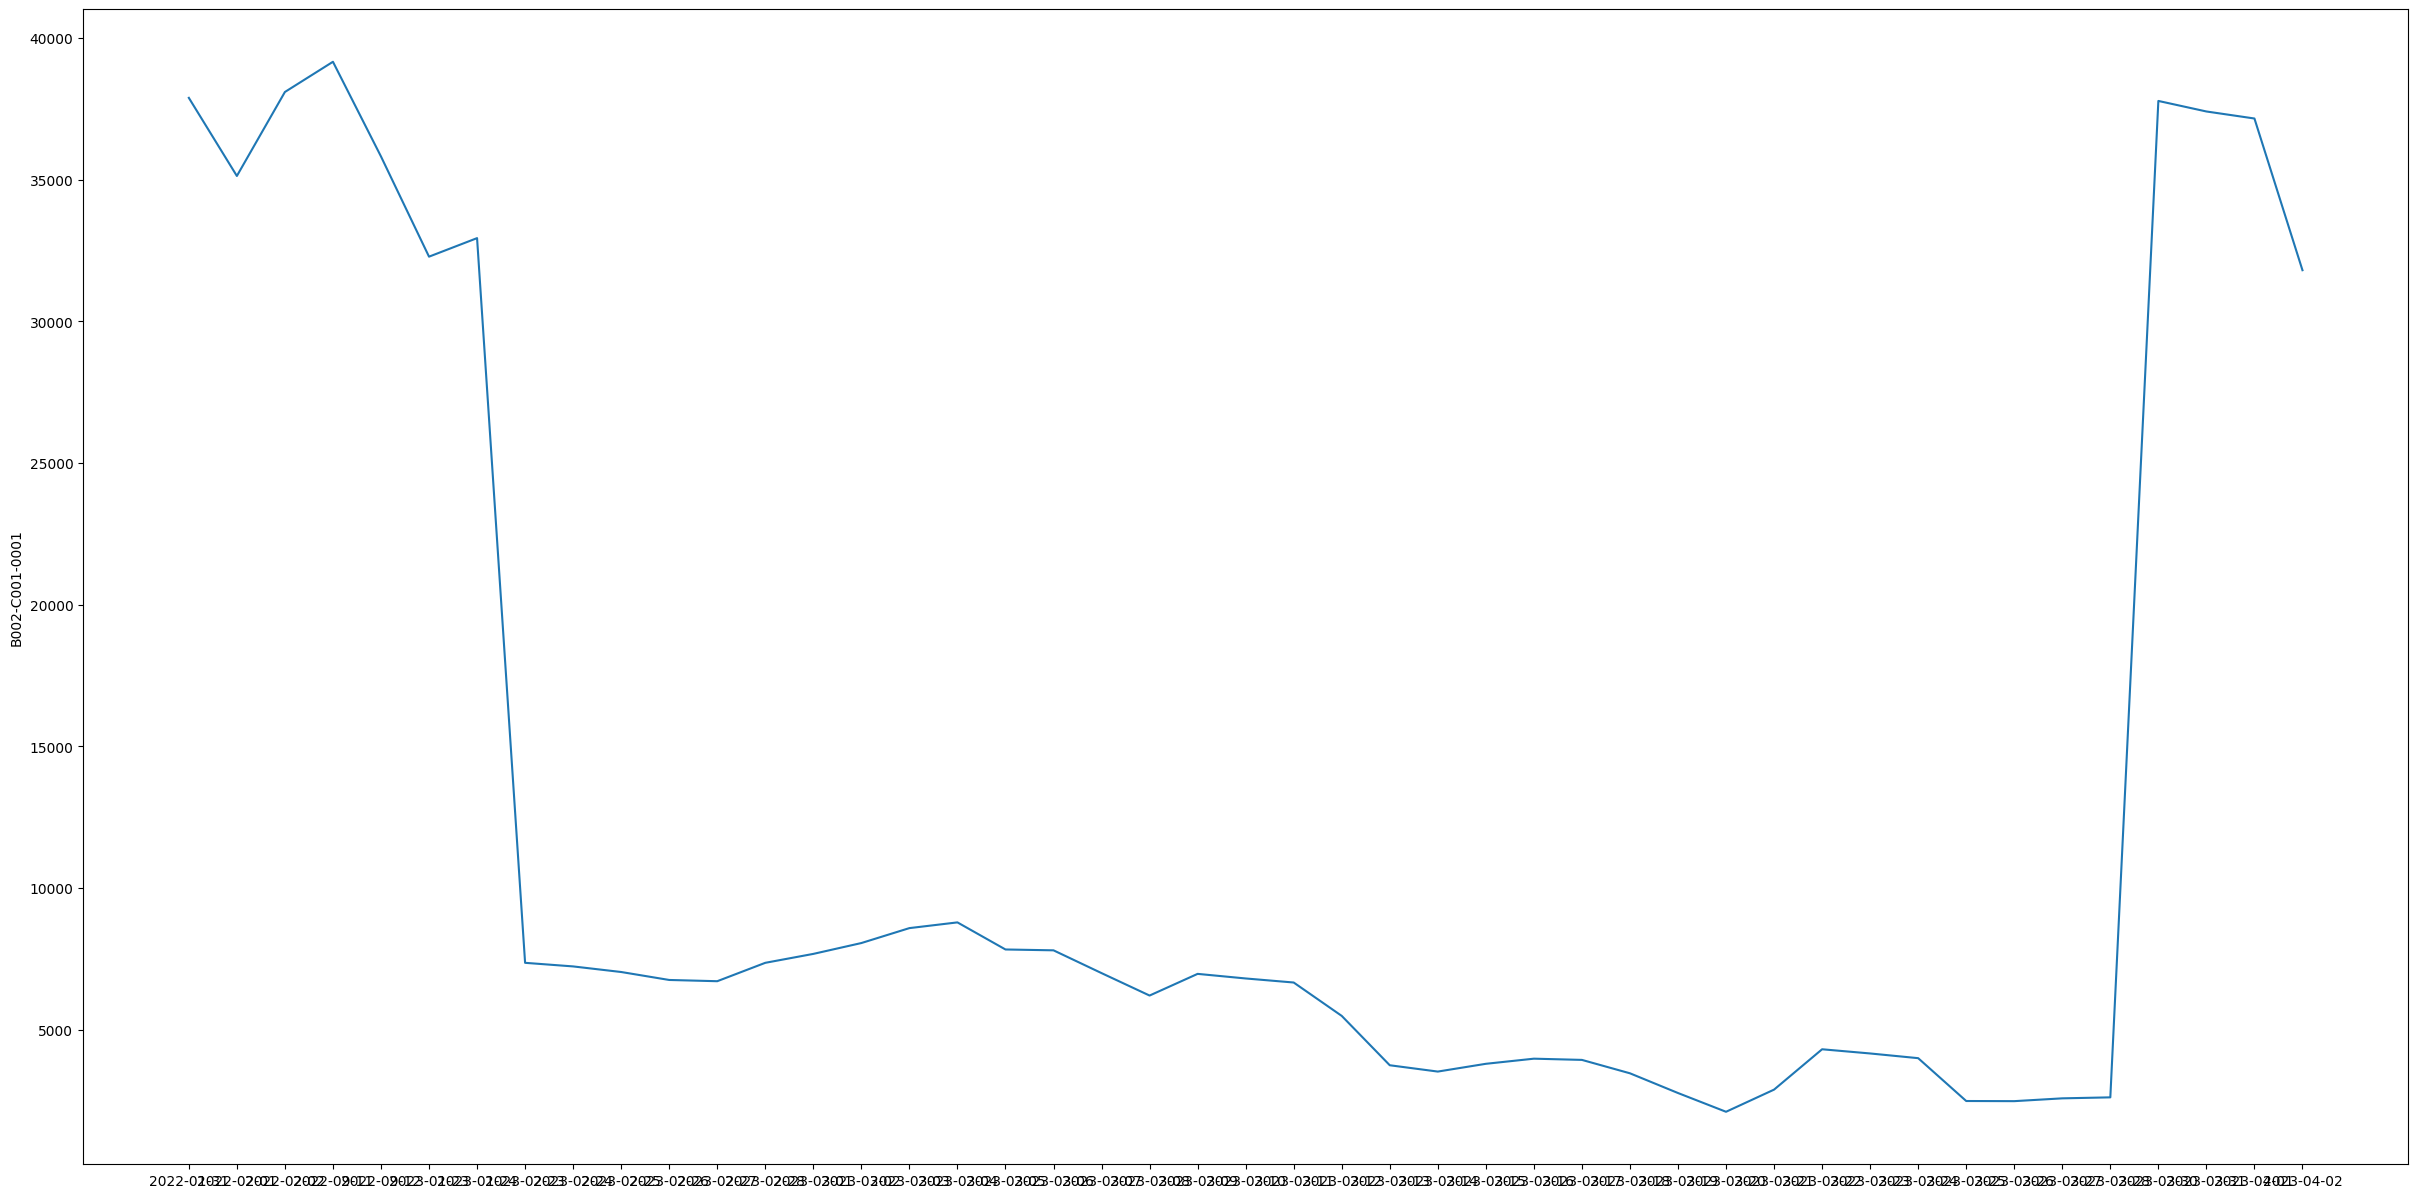

In [173]:
plt.figure(figsize=(30,15))
sns.lineplot(t)

In [85]:
train.iloc[0][6:]

2022-01-01    0
2022-01-02    0
2022-01-03    0
2022-01-04    0
2022-01-05    0
             ..
2023-03-31    0
2023-04-01    0
2023-04-02    0
2023-04-03    0
2023-04-04    0
Name: 0, Length: 459, dtype: object

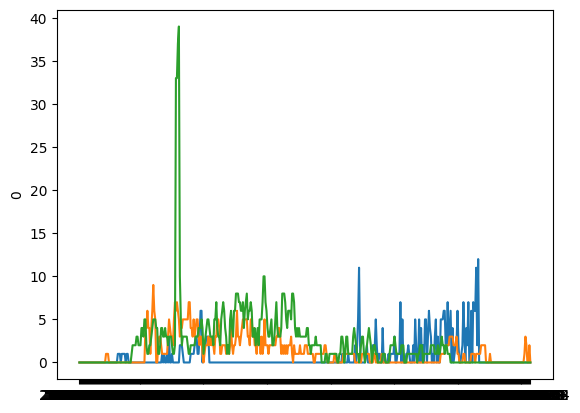

In [103]:
count = 0
for row in range(len(train)):
    sns.lineplot(data=train.iloc[row][6:])  # Plot each column of data
    count +=1
    if count == 3 : break
#plt.show()

# 중분류에 따른 판매량 plot

In [253]:
sell_per_middle = train.groupby(['중분류']).sum()[date]
sell_per_middle

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
중분류,,,,,,,,,,,,,,,,,,,,,
B002-C002-0001,83114,72705,56233,53584,65530,73783,83867,102257,108720,101013,...,2279,2379,2396,43381,36738,35749,35861,30678,40233,53890
B002-C002-0002,2532,2335,2045,2110,2618,2799,2856,2479,2418,2117,...,4,4,4,2114,1932,1498,1346,1686,1913,2271
B002-C002-0003,5477,5144,5499,5328,6329,7045,6572,5299,5238,4933,...,8,10,12,3864,4156,3433,3541,3432,4791,5470
B002-C002-0004,5816,5163,5519,6115,8285,9338,9045,7677,6940,6234,...,0,4,12,13979,14991,11065,9733,9567,14745,17143
B002-C002-0005,78935,55935,50808,53050,66268,74396,72573,58748,60729,52791,...,2861,2749,2517,62414,64190,41978,42461,45490,54263,54017
B002-C002-0006,6635,4323,4241,4643,5743,6965,7304,8178,8611,7837,...,436,317,324,5141,5276,5413,3727,4481,5194,5397
B002-C002-0007,10980,9323,8133,9309,11462,12402,12048,10558,10009,9390,...,752,710,710,7816,8347,7222,5487,6629,9051,9461
B002-C002-0008,0,0,0,0,0,0,0,0,0,0,...,567,627,609,1920,1961,2101,1324,1616,2011,1903
B002-C002-0009,4670,3376,3097,3556,5372,5900,4879,3894,3441,3054,...,612,640,676,4754,3831,4347,3947,3237,4658,5090


In [254]:
sell_per_middle = sell_per_middle.reset_index()
display(sell_per_middle.head())
print(len(sell_per_middle))

,중분류,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C002-0001,83114,72705,56233,53584,65530,73783,83867,102257,108720,...,2279,2379,2396,43381,36738,35749,35861,30678,40233,53890
1,B002-C002-0002,2532,2335,2045,2110,2618,2799,2856,2479,2418,...,4,4,4,2114,1932,1498,1346,1686,1913,2271
2,B002-C002-0003,5477,5144,5499,5328,6329,7045,6572,5299,5238,...,8,10,12,3864,4156,3433,3541,3432,4791,5470
3,B002-C002-0004,5816,5163,5519,6115,8285,9338,9045,7677,6940,...,0,4,12,13979,14991,11065,9733,9567,14745,17143
4,B002-C002-0005,78935,55935,50808,53050,66268,74396,72573,58748,60729,...,2861,2749,2517,62414,64190,41978,42461,45490,54263,54017


11


In [255]:
name_middle = sell_per_middle['중분류']
print(name_middle)
temp = sell_per_middle.T.iloc[1:]
temp.head()

0     B002-C002-0001
1     B002-C002-0002
2     B002-C002-0003
3     B002-C002-0004
4     B002-C002-0005
5     B002-C002-0006
6     B002-C002-0007
7     B002-C002-0008
8     B002-C002-0009
9     B002-C002-0010
10    B002-C002-0011
Name: 중분류, dtype: object


,0,1,2,3,4,5,6,7,8,9,10
2022-01-01,83114,2532,5477,5816,78935,6635,10980,0,4670,31,6592
2022-01-02,72705,2335,5144,5163,55935,4323,9323,0,3376,33,7219
2022-01-03,56233,2045,5499,5519,50808,4241,8133,0,3097,17,7626
2022-01-04,53584,2110,5328,6115,53050,4643,9309,0,3556,16,8333
2022-01-05,65530,2618,6329,8285,66268,5743,11462,0,5372,19,6409


In [256]:
temp = temp.rename(columns=dict(zip(temp.columns, name_middle)))

In [257]:
temp

,B002-C002-0001,B002-C002-0002,B002-C002-0003,B002-C002-0004,B002-C002-0005,B002-C002-0006,B002-C002-0007,B002-C002-0008,B002-C002-0009,B002-C002-0010,B002-C002-0011
2022-01-01,83114,2532,5477,5816,78935,6635,10980,0,4670,31,6592
2022-01-02,72705,2335,5144,5163,55935,4323,9323,0,3376,33,7219
2022-01-03,56233,2045,5499,5519,50808,4241,8133,0,3097,17,7626
2022-01-04,53584,2110,5328,6115,53050,4643,9309,0,3556,16,8333
2022-01-05,65530,2618,6329,8285,66268,5743,11462,0,5372,19,6409
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,35749,1498,3433,11065,41978,5413,7222,2101,4347,8,9639
2023-04-01,35861,1346,3541,9733,42461,3727,5487,1324,3947,37,5721
2023-04-02,30678,1686,3432,9567,45490,4481,6629,1616,3237,17,4007
2023-04-03,40233,1913,4791,14745,54263,5194,9051,2011,4658,56,6736


<Axes: >

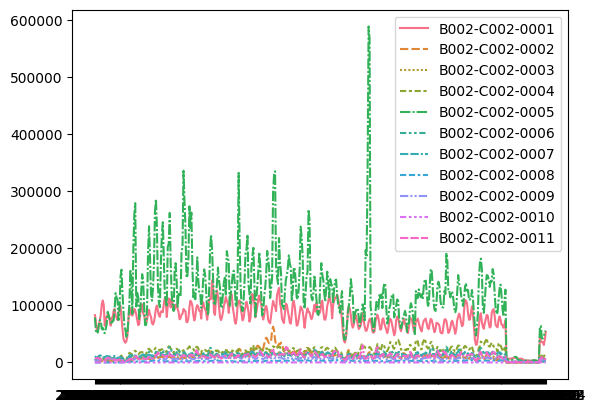

In [258]:
sns.lineplot(temp)

<Axes: ylabel='B002-C002-0005'>

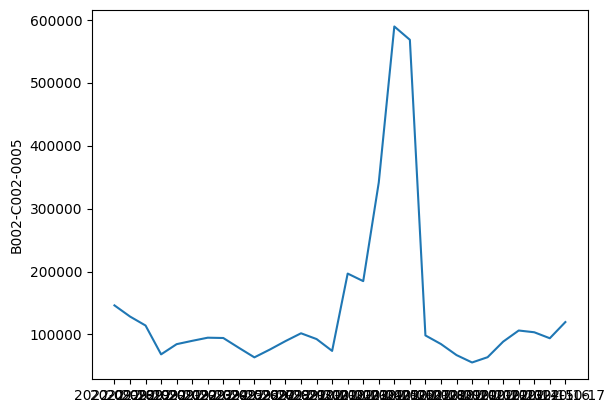

In [266]:
sns.lineplot(temp['B002-C002-0005'].iloc[260:290])

# 소분류에 따른 판매량 plotting

,소분류,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C003-0001,7139,6480,6410,7237,10756,14396,16040,11582,10227,...,382,393,357,7895,7158,7115,6222,5615,7389,8965
1,B002-C003-0002,6913,6116,6167,6303,7987,9195,9575,8381,8153,...,361,340,369,4346,4218,3680,3040,4092,4345,5041
2,B002-C003-0003,34461,29017,27853,28234,31706,32975,31948,33171,39966,...,1416,1533,1559,8360,8461,6358,6818,7024,8476,10177
3,B002-C003-0004,32405,29057,14608,10708,13604,15282,24105,47133,48157,...,75,72,72,21656,14721,17266,18858,12717,19076,27735
4,B002-C003-0005,2196,2035,1195,1102,1477,1935,2199,1990,2217,...,45,41,39,1124,2180,1330,923,1230,947,1972


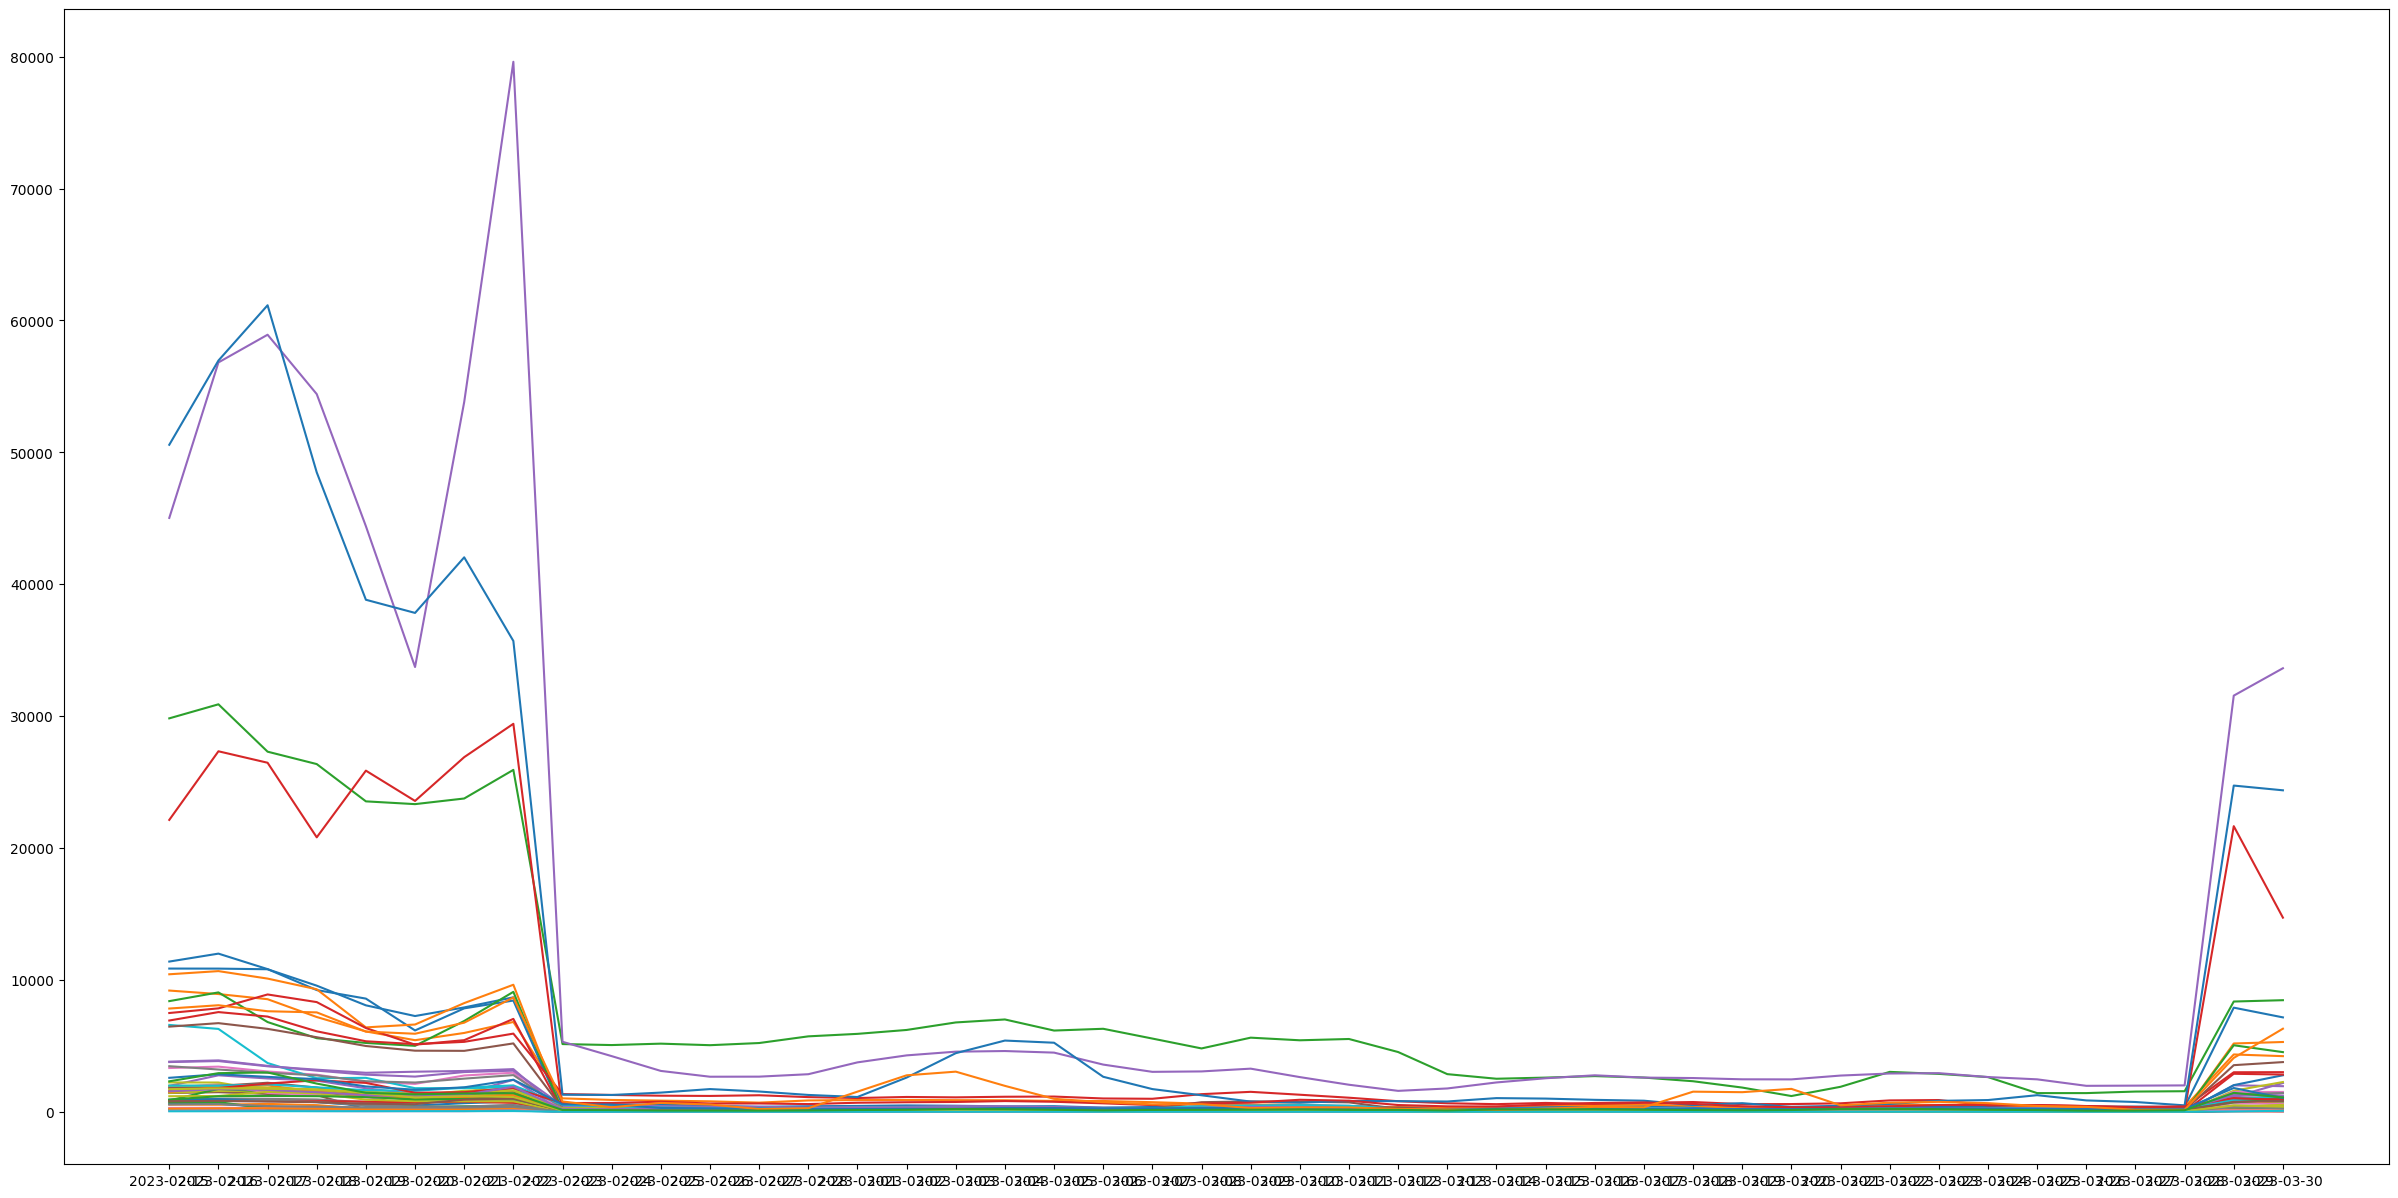

In [239]:
sell_per_small = train.groupby(['소분류']).sum()[date]
sell_per_small = sell_per_small.reset_index()
display(sell_per_small.head())
name_small = sell_per_small['소분류']
temp = sell_per_small.T.iloc[1:]
temp = temp.rename(columns=dict(zip(temp.columns, name_small)))
plt.figure(figsize=(30,15))
plt.plot(temp.iloc[410:-5]);

In [245]:
sell_per_small.iloc[:,410:-5]

,2023-02-14,2023-02-15,2023-02-16,2023-02-17,2023-02-18,2023-02-19,2023-02-20,2023-02-21,2023-02-22,2023-02-23,...,2023-03-21,2023-03-22,2023-03-23,2023-03-24,2023-03-25,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30
0,8504,10859,10856,10807,9563,8071,7260,7913,8677,481,...,371,396,378,439,350,382,393,357,7895,7158
1,7158,9192,8927,8536,7186,6091,5428,5977,6809,1018,...,309,535,520,539,372,361,340,369,4346,4218
2,25079,29832,30897,27305,26365,23538,23328,23755,25925,5134,...,1894,3025,2874,2630,1416,1416,1533,1559,8360,8461
3,19553,22131,27335,26466,20811,25867,23570,26890,29419,86,...,60,64,66,88,81,75,72,72,21656,14721
4,1430,1965,2765,2525,2359,1782,1345,1386,2423,78,...,37,48,57,56,47,45,41,39,1124,2180
5,1139,1421,1485,1352,1265,189,253,217,212,7,...,3,3,3,3,2,0,0,0,81,97
6,286,238,277,291,217,146,115,221,195,0,...,0,0,0,0,0,0,0,0,176,174
7,642,895,999,986,935,724,726,760,881,1,...,7,5,3,1,5,4,4,4,471,448
8,1234,1436,1576,1566,1619,1459,1348,1341,1261,0,...,0,0,0,0,0,0,0,0,956,670
9,190,144,204,227,332,137,120,96,98,0,...,0,0,0,0,0,0,0,0,91,48


,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,B002-00003,0,0,0,22,37,39,30,28,23,...,0,0,0,0,0,0,0,0,0,11
3,B002-00005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,0,10,0,0,1
4,B002-00006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3170
0       B002-00001
1       B002-00002
2       B002-00003
3       B002-00005
4       B002-00006
           ...    
3165    B002-03794
3166    B002-03795
3167    B002-03796
3168    B002-03798
3169    B002-03799
Name: 브랜드, Length: 3170, dtype: object


KeyboardInterrupt: 

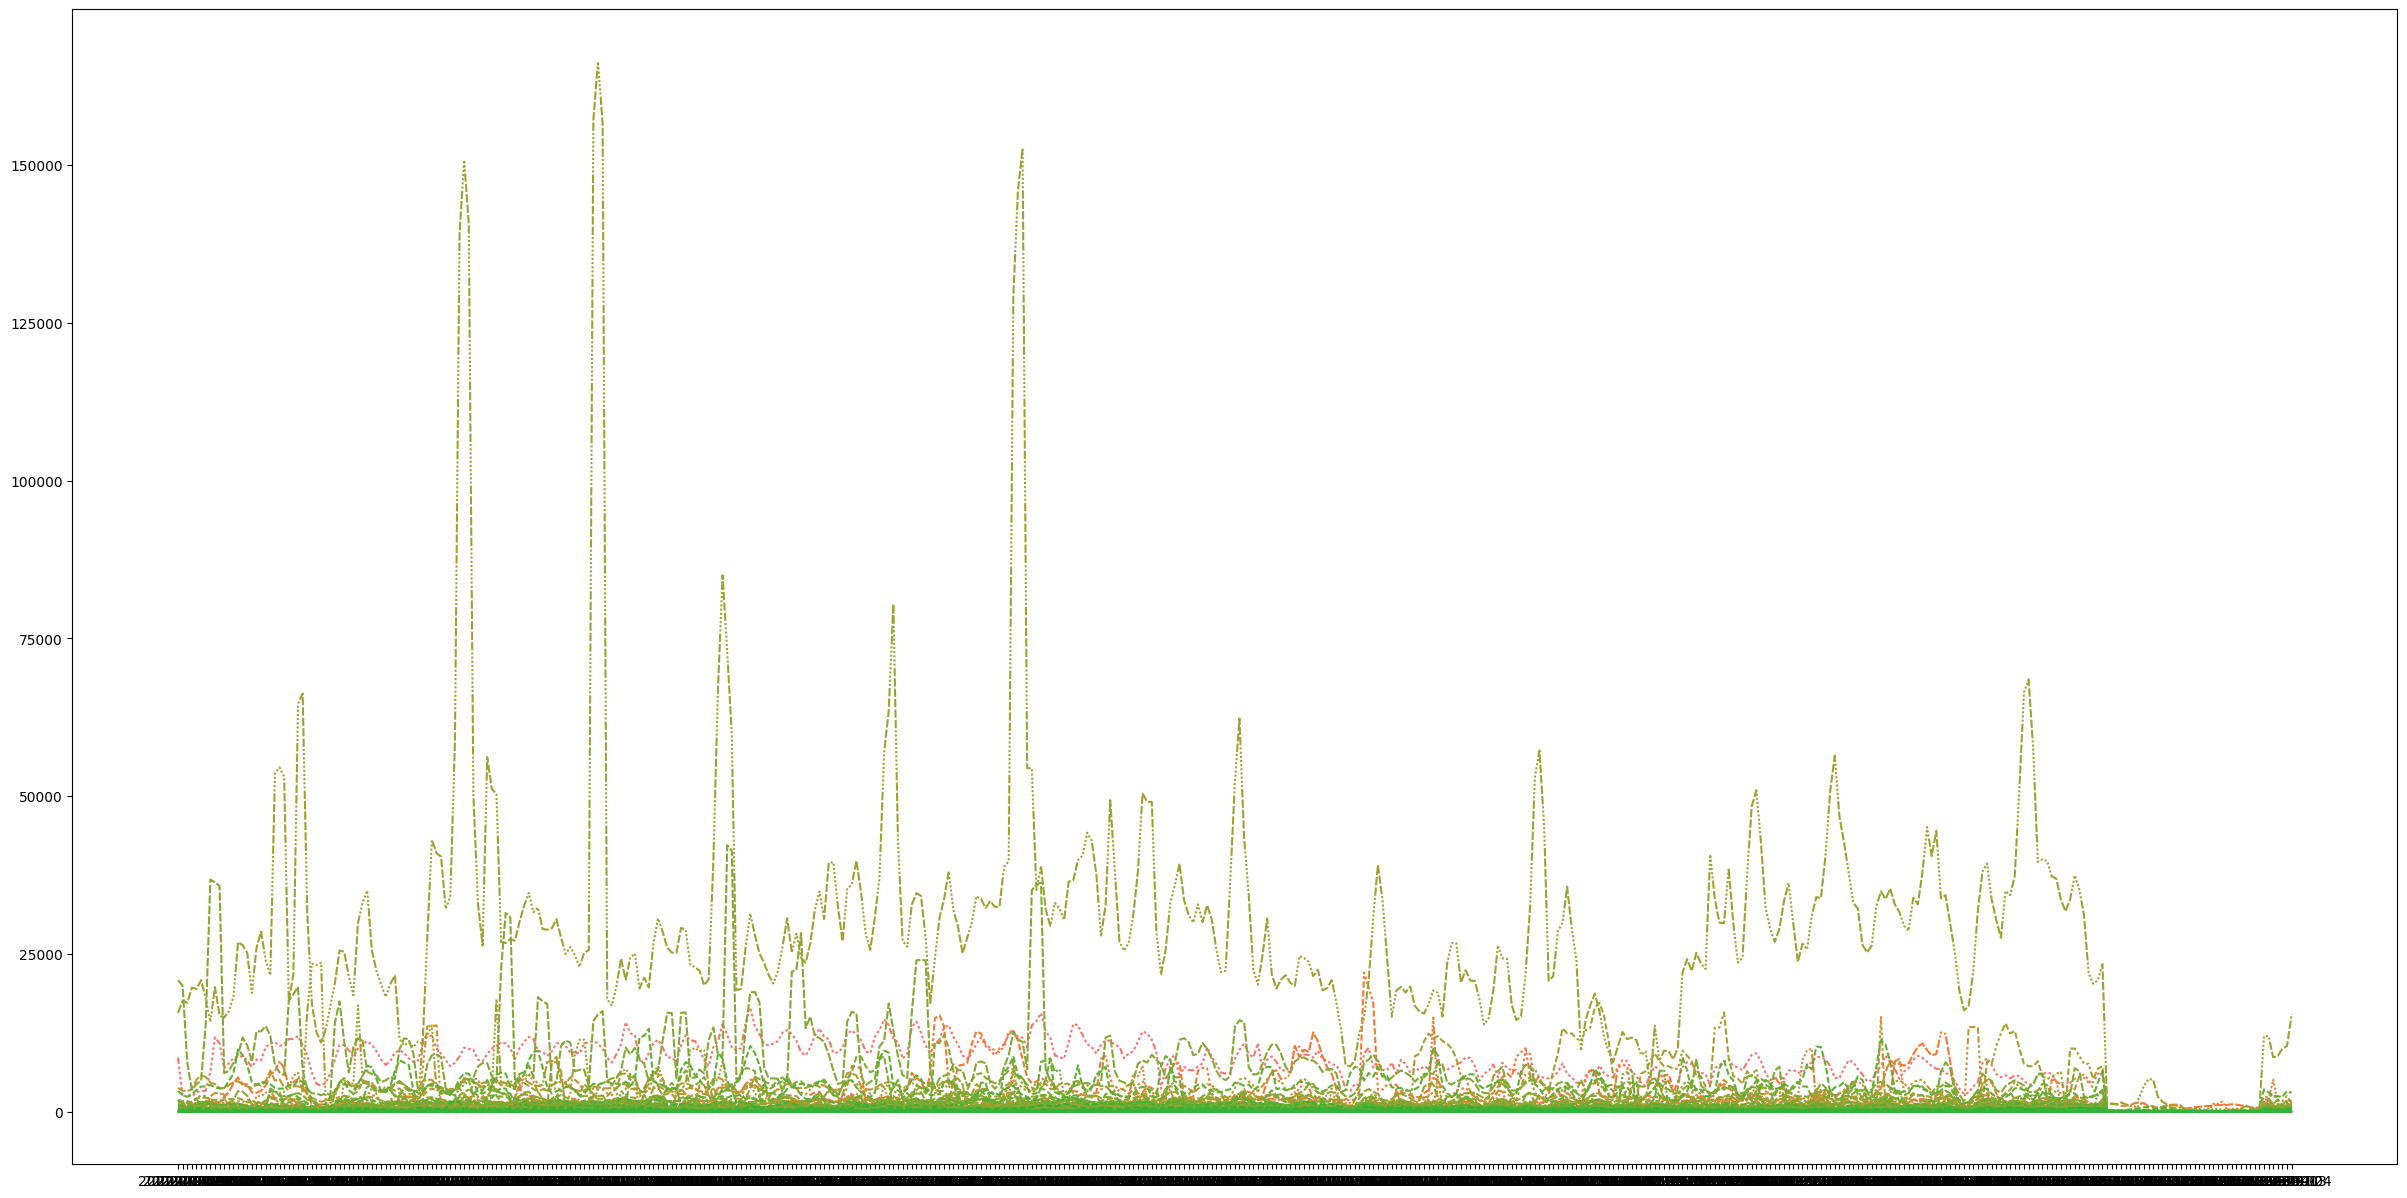

In [275]:
sell_per_Brands = train.groupby(['브랜드']).sum()[date]
sell_per_Brands = sell_per_Brands.reset_index()
display(sell_per_Brands.head())
print(len(sell_per_Brands))

name_Brands = sell_per_Brands['브랜드']
print(name_Brands)
temp = sell_per_Brands.T.iloc[1:]

#편하게 보기 위해 column rename
temp = temp.rename(columns=dict(zip(temp.columns, name_Brands)))

In [287]:
c = list(sell_per_Brands.columns[275:285])
sell_per_Brands[c]

,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11
0,0,0,0,0,0,0,2,0,2,5
1,6,5,5,5,7,8,8,7,5,3
2,76,64,94,85,38,68,21,18,47,49
3,120,23,33,93,57,90,86,41,63,65
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3165,6,5,5,4,4,4,4,5,5,4
3166,0,3,3,4,4,3,3,1,1,1
3167,405,432,403,616,628,639,539,383,327,412
3168,207,141,174,213,383,393,410,331,181,146


In [288]:
sales

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,22400,67200,44800,0,0,44800,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,60690,0,40460,80920,20230,20230,60690
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27300


In [290]:
sale_per_Large = sales.groupby(['대분류']).sum()[date]
sale_per_Large = sale_per_Large.reset_index()
display(sale_per_Large.head())
print(len(sale_per_Large))

,대분류,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C001-0001,1006096100,962565470,929903500,970501660,1138074240,1215803770,1194119360,1091793110,1138197580,...,68891910,69433410,67686550,653345890,606333550,585588490,521853800,561542120,620586140,706928130
1,B002-C001-0002,532549420,385326600,342275260,368378680,469389960,511565940,489747560,441948530,432163920,...,30271110,27519330,28241430,444956750,442153980,382770360,337819350,360943300,469561430,451079030
2,B002-C001-0003,164430,185530,107830,95540,127130,186090,182740,248040,260940,...,13108200,13106600,14056700,43692970,37341330,31632230,27541520,34213440,37102690,39669990
3,B002-C001-0004,25170,6560,17860,74660,110590,128610,183930,196580,150140,...,729300,765100,791700,1604680,1582120,1514860,1187060,1475490,1930520,2108170
4,B002-C001-0005,10477260,8787850,8026850,8840900,8828240,9079460,10226680,7418360,8456380,...,669860,519260,616380,11521670,12636260,15612580,10383350,7947170,12670890,11264030


5


0    B002-C001-0001
1    B002-C001-0002
2    B002-C001-0003
3    B002-C001-0004
4    B002-C001-0005
Name: 대분류, dtype: object


<Axes: >

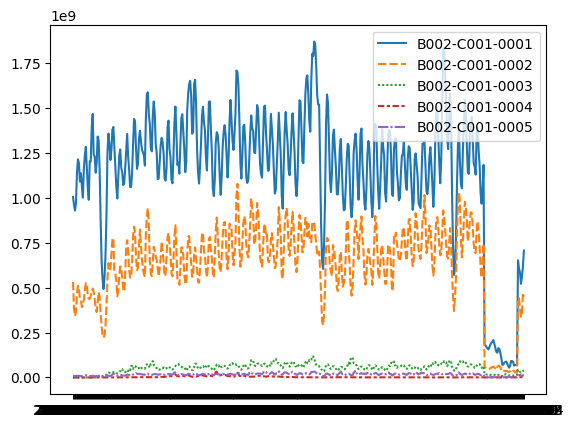

In [292]:
name_large = sale_per_Large['대분류']
print(name_large)
temp = sale_per_Large.T.iloc[1:]
temp.head()
temp = temp.rename(columns=dict(zip(temp.columns, name_large)))
sns.lineplot(temp)

# 대분류로 시작하여 ID 파악

In [298]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['대분류', '중분류', '소분류', '브랜드']

for col in categorical_columns:
    label_encoder.fit(train[col])
    train[col] = label_encoder.transform(train[col])

In [299]:
train

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,1,6,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,2,7,43,1,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,2,7,43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,2,7,43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,2,7,41,3169,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,2,7,43,3169,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,B002-03799-00004,2,7,43,3169,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,2,7,43,3169,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [308]:
train[train['대분류'] == 4]['소분류'].value_counts()

소분류
51    392
52    221
Name: count, dtype: int64

In [310]:
train[train['대분류'] == 4]['브랜드'].value_counts()

브랜드
238     59
2080    47
1440    35
991     29
2891    24
        ..
1355     1
1328     1
1208     1
1124     1
3126     1
Name: count, Length: 124, dtype: int64

# Sliding Windows를 통해 보는 시계열 데이터

In [364]:
window_size = 7

# Initialize an empty list to store the data for the new DataFrame
new_df = []

# Slide the window through each column of the original DataFrame
for i in range(len(f.columns) - window_size + 1):
    # Extract the data for the current window
    window_data = f.iloc[:, i:i+window_size]
    # Append the data for the current window to the list
    new_df.append(window_data.values.sum(axis=1))
new_df = pd.DataFrame(new_df)
new_df
# # Create a new DataFrame using the data collected from the sliding windows
# # 

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0,0,0,0,0,0,0,0,0,0,...,36,0,0,0,0,0,0,27,0,336
1,0,0,0,0,0,0,0,0,0,0,...,69,0,0,0,0,0,0,25,0,336
2,0,0,0,0,0,0,0,0,0,0,...,109,0,0,0,0,0,0,24,0,360
3,0,0,0,0,0,0,0,0,0,0,...,149,0,0,0,0,0,0,18,0,384
4,0,0,0,0,0,0,0,0,0,0,...,166,0,0,0,0,0,0,13,0,408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0,0,0,0,0,0,2002,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,0,0,0,0,0,0,2482,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450,0,0,0,0,0,0,2867,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,3636,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='0'>

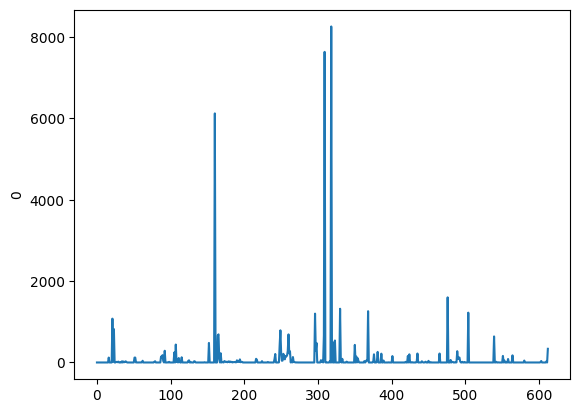

In [366]:
sns.lineplot(new_df.loc[0])

# Sales 데이터에 train 데이터 아웃라이어 구간표시

,대분류,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C001-0001,1006096100,962565470,929903500,970501660,1138074240,1215803770,1194119360,1091793110,1138197580,...,68891910,69433410,67686550,653345890,606333550,585588490,521853800,561542120,620586140,706928130
1,B002-C001-0002,532549420,385326600,342275260,368378680,469389960,511565940,489747560,441948530,432163920,...,30271110,27519330,28241430,444956750,442153980,382770360,337819350,360943300,469561430,451079030
2,B002-C001-0003,164430,185530,107830,95540,127130,186090,182740,248040,260940,...,13108200,13106600,14056700,43692970,37341330,31632230,27541520,34213440,37102690,39669990
3,B002-C001-0004,25170,6560,17860,74660,110590,128610,183930,196580,150140,...,729300,765100,791700,1604680,1582120,1514860,1187060,1475490,1930520,2108170
4,B002-C001-0005,10477260,8787850,8026850,8840900,8828240,9079460,10226680,7418360,8456380,...,669860,519260,616380,11521670,12636260,15612580,10383350,7947170,12670890,11264030


5
0    B002-C001-0001
1    B002-C001-0002
2    B002-C001-0003
3    B002-C001-0004
4    B002-C001-0005
Name: 대분류, dtype: object


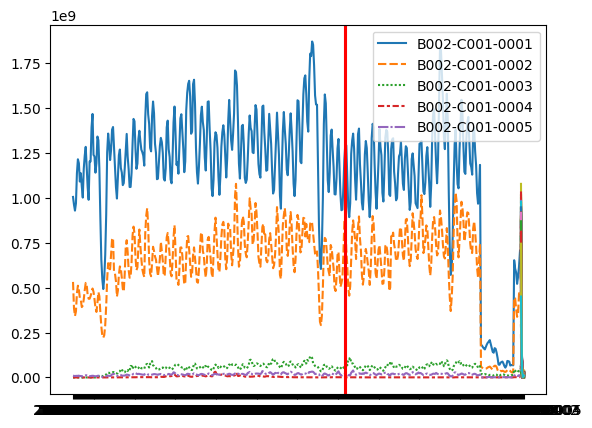

In [88]:
#sales[date]
sell_per_Large = sales.groupby(['대분류']).sum()[date]
sell_per_Large = sell_per_Large.reset_index()
display(sell_per_Large.head())
print(len(sell_per_Large))

name_large = sell_per_Large['대분류']
print(name_large)
temp = sell_per_Large.T.iloc[1:]
temp.head()

temp = temp.rename(columns=dict(zip(temp.columns, name_large)))

sns.lineplot(temp)
plt.plot(temp.iloc[:,1:].T);
plt.axvline(x=279,color='red')
plt.axvline(x=280,color='red')